In [ ]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# dlib model 다운로드

# Colab에서 GitHub 에 있는 데이터 가져오기
# 다운로드 할 수 있는 URL : https://github.com/davisking/dlib-models
# Clone Web URL 를 복사해 옵니다.

!git clone https://github.com/davisking/dlib-models.git

Cloning into 'dlib-models'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 182 (delta 15), reused 11 (delta 1), pack-reused 154
Receiving objects: 100% (182/182), 368.07 MiB | 42.54 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
# 압축 파일 풀기
!bzip2 -d dlib-models/shape_predictor_68_face_landmarks.dat.bz2
print('shape_predictor_68_face_landmarks.dat.bz2 extracted!!')
!bzip2 -d dlib-models/shape_predictor_5_face_landmarks.dat.bz2
print('shape_predictor_5_face_landmarks.dat.bz2 extracted!!')

shape_predictor_68_face_landmarks.dat.bz2 extracted!!
shape_predictor_5_face_landmarks.dat.bz2 extracted!!


In [ ]:
# 필요한 파일만 복사
!cp dlib-models/shape_predictor_68_face_landmarks.dat gdrive/My\ Drive/CV/Face\ Landmark/
print('dlib-models 68_face_landmarks copy complete!!')
!cp dlib-models/shape_predictor_5_face_landmarks.dat gdrive/My\ Drive/CV/Face\ Landmark/
print('dlib-models 5_face_landmarks copy complete!!')

dlib-models 68_face_landmarks copy complete!!
dlib-models 5_face_landmarks copy complete!!


In [ ]:
# 다운로드 받았던 파일 제거(선택사항)
!rm -r dlib-models

In [ ]:
# 필요한 패키지와 모듈을 불러옴
import numpy as np
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# 68개의 facial landmark 정의
RIGHT_EYE = list(range(36, 42))   # 오른쪽 눈
LEFT_EYE = list(range(42, 48))    # 왼쪽 눈
EYES = list(range(36, 48))        # 양쪽 눈
MOUTH = list(range(48, 68))       # 입
NOSE = list(range(27, 36))        # 코
EYEBROWS = list(range(17, 27))    # 양쪽 눈썹
JAWLINE = list(range(1, 17))      # 턱선
ALL = list(range(0, 68))          # 얼굴 전체   

In [ ]:
# 이미 학습된 dlib 모델을 불러옴.
predictor_file = 'gdrive/My Drive/CV/Face Landmark/shape_predictor_68_face_landmarks.dat'
image_file = 'myface.jpg'  # 원본 이미지 파일

In [ ]:
detector = dlib.get_frontal_face_detector()       # 얼굴을 감지하는 detector 정의
predictor = dlib.shape_predictor(predictor_file)  # facial landmark 을 찾아주는 predictor 정의

Number of faces detected: 1
rectangles[[(205, 241) (526, 562)]]


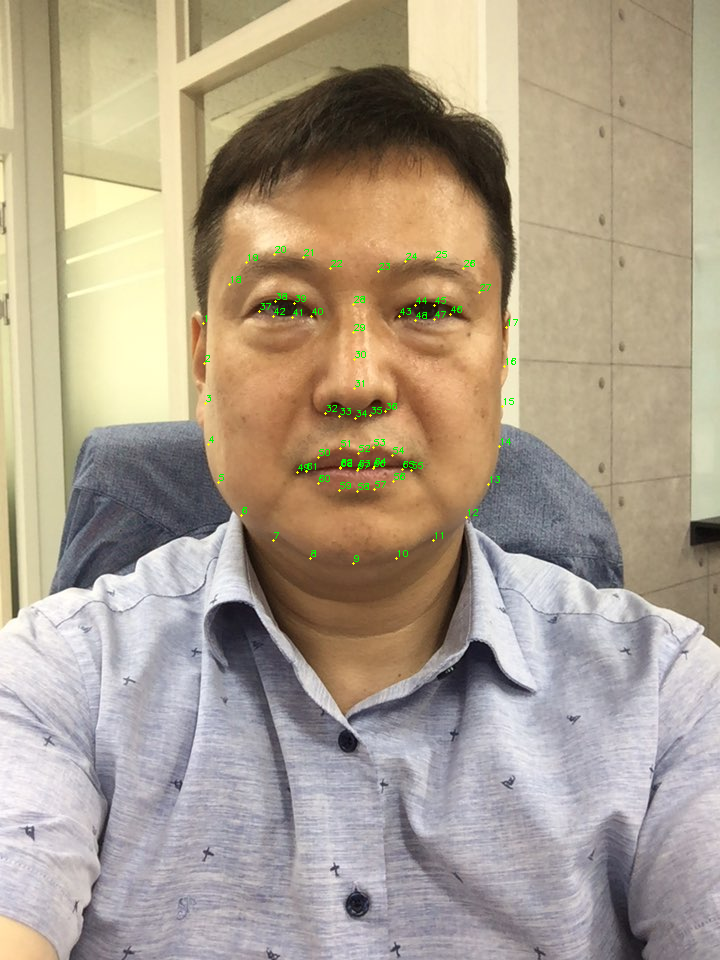

In [ ]:
image = cv2.imread(image_file)  # 원본 이미지 파일을 불러옴
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 # detection 할때 이미지 레이어를 몇번을 적용하겠느냐? '1'을 적용하면 큰이미지도 인식할 수 있음
rects = detector(gray, 1)  # detector 에 의해 얼굴 감지 
print("Number of faces detected: {}".format(len(rects)))
print(rects)

for (i, rect) in enumerate(rects):
    # predictor 에 의해서 감지된 landmark point 를 x, y 좌표로 계산
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    show_parts = points[ALL]
    
    for (i, point) in enumerate(show_parts):
        x = point[0,0]  # x 좌표 값 
        y = point[0,1]  # y 좌표 값
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)     # 점을 찍어준다.
        cv2.putText(image, "{}".format(i + 1), (x, y - 2),
		cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)     # 점에 숫자 표시

cv2_imshow(image)